NAME: HIMANI YADAV

TASK 2: PREDICTION USING UNSUPERVISED MACHINE LEARNING

THE SPARKS FOUNDATION (GRIP): DATA SCIENCE AND BUSINESS ANALYTICS



> THE AIM OF THIS PROJECT IS TO PREDICT THE OPTIMUM NUMBER OF CLUSTERS FROM THE IRIS DATASET AND VISUALIZE IT.



STEP 1: IMPORTING THE REQUIRED LIBRARIES



In [ ]:
#Importing the required libraries
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn import datasets


STEP 2: LOADING THE IRIS DATASET

In [ ]:
#Load the iri dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df.head()) 

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


STEP 3: DETERMINING THE OPTIMUM NUMBER OF CLUSTERS USING THE ELBOW METHOD

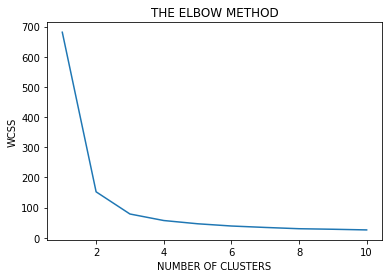

In [ ]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values


from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS') #Within cluster sum of squares
plt.show()



> FROM THE ABOVE PLOT, THE OPTIMUM NUMBER OF CLUSTERS IS 3 AS THE BENDING POINT FALLS SOMEWHERE BETWEEN 2 AND 4.



STEP 3: CREATING THE KMEANS CLASSIFIER

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

STEP 4: PLOTTING THE CLUSTERS

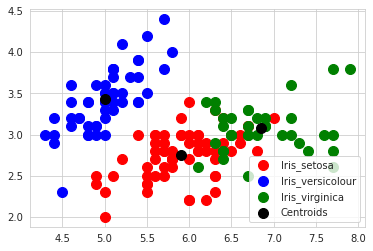

In [ ]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris_setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris_versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris_virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

STEP 5: 3D SCATTERPLOT USING MATPLOTLIB

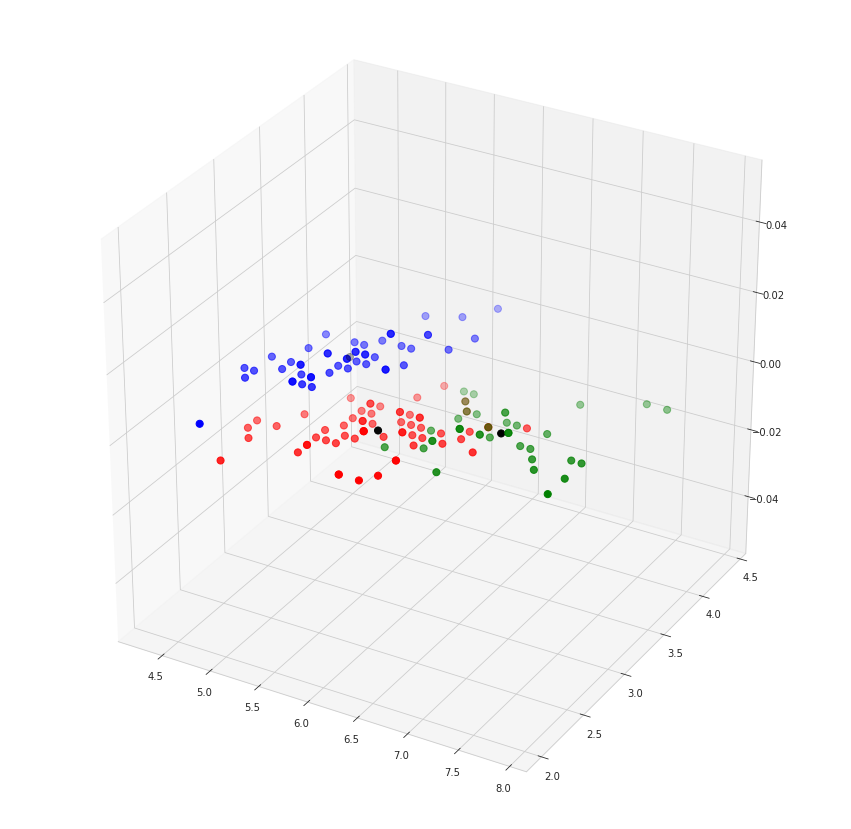

In [ ]:
#Visualising the clusters in 3d
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Iris_setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Iris_versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris_virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'black', label = 'Centroids')
plt.show()

STEP 6: LABELLING THE PREDICATIONS

In [ ]:
#considering 0 Corresponds to 'Iris.setosa'
#1 to 'Iris.versicolor'
#2 to 'Iris.virginica'
y_kmeans = np.where(y_kmeans==0, 'Iris.setosa', y_kmeans)
y_kmeans = np.where(y_kmeans=='1', 'Iris.versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans=='2', 'Iris.virginica', y_kmeans)

STEP 7: ADDING THE PREDICTION TO THE DATASET

In [ ]:
data_with_clusters = iris_df.copy()
data_with_clusters["Cluster"] = y_kmeans
print(data_with_clusters.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

            Cluster  
0  Iris.versicolour  
1  Iris.versicolour  
2  Iris.versicolour  
3  Iris.versicolour  
4  Iris.versicolour  


STEP 8: BAR PLOT CLUSTER DISTRIBUTION

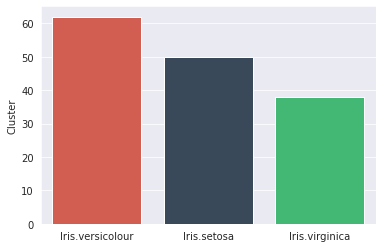

In [ ]:
# Bar plot
sbn.set_style('darkgrid')
sbn.barplot(x = data_with_clusters["Cluster"] .unique(),
            y = data_with_clusters["Cluster"] .value_counts(),
            palette=sbn.color_palette(["#e74c3c", "#34495e", "#2ecc71"]));

STEP 9: PAIRING THE PLOT

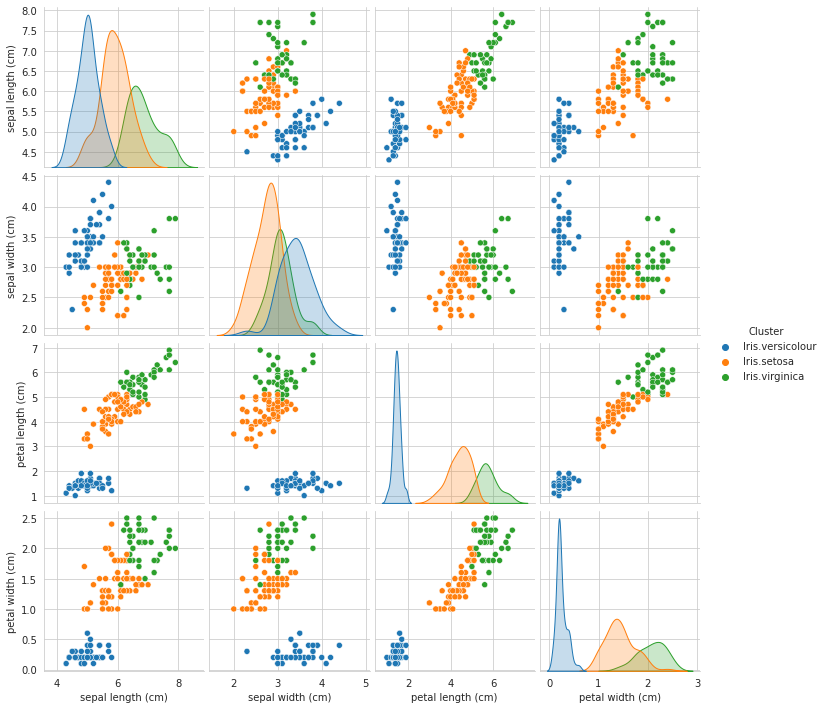

In [ ]:
### hue = species colours plot as per species
### It will give 3 colours in the plot

sbn.set_style('whitegrid')   ### Sets grid style
sbn.pairplot(data_with_clusters,hue = 'Cluster');

STEP 10: PAIRPLOT INSIGHTS



1.   THE PETAL LENGTH AND THE PETAL WIDTH SEEM TO BE POSITIVELY CORRELATED AND HAVE A LINEAR RELATIONSHIP.
2.   IRIS SETOSA SEEMS TO HAVE A SMALLER PETAL LENGTH AND PETAL WIDTH AS COMPARED TO OTHERS AND IT SEEMS THAT IRIS SETOSE HAS SMALLER DIMENSIONS THAN OTHER FLOWERS.




**THANK YOU!!!!**